## 02. infinite potential well

eigen value problem
$$A\vec{x}=\lambda \vec{x} $$
H Hamiltonian operator - 2계 미분연산자, wave function, wave vector=eigenvector $\vec{x}=\psi(x) $, quantization energy=eigenvalue $\lambda$
$$H\psi(x)=E\psi(x)=-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)=-\frac{\hbar^2}{2m}\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta x^2}=\lambda \psi(x) $$
수치해석적으로 고유값과 고유벡터를 얻는다. 2계 도함수을 표현하면
$$\frac{d^2\psi}{dx^2}\simeq\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta x^2} $$

$$ D=
\begin{pmatrix}
-2 & 1 & 0 \\
1 & -2 & 1 \\
0 & 1 & -2 
\end{pmatrix}$$

D = np.zeros((N_inner, N_inner))\
np.fill_diagonal(D, -2)\
for i in range(N_inner - 1):\
    D[i, i + 1] = 1\
    D[i + 1, i] = 1\
print(A)\

E, psi=eigh(-hbar^2/(2*m*q)*D/dx**2) #eigenvalue Energy, eigenvector wave function\
print(E)\
print(psi)\
x = np.linspace(0, a, N)\

wavefunctions = np.zeros((N, psi.shape[1])) \
wavefunctions[1:-1, :] = psi\

Analytical soultion

$$\psi(0)=\psi(a)=0 $$
$$\nabla^2\psi=-k^2\psi$$
$$\frac{d^2}{dx^2}\psi(x)=-\frac{2mE}{\hbar^2}\psi(x)=-k^2\psi(x) $$
-> eigen value 와 동일한 형태이다. 여기서 $-k^2 $이 고유값이 된다. 파동함수의 일반꼴로 sine 함수와 cosine 함수의 선형 결합이 될 것이다.


$$\psi(x)=A_1 coskx+A_2 sinkx $$
경계조건을 A1=0, x=a $\psi(x)=A_2 sinka=0 $ A2=0이면, 파동함수가 모든 점에서 0이 되게 하여 물리적으로 올바르지 않다. 따라서 적합한 조건은 어떤 자연수 n에 대해서
$$ka=n\pi $$
의 관계를 만족시키는 것이다. 이로부터 k는 아무값이나 가질 수 있는 것이 아니라 특정한 몇몇 값들을 가질 수 있다는 것을 알게 된다. 이것을 k가 양자화 되어 있다고 표현한다. \
결국 주어진 양자수 n에 대하여, 고유값과 고유 함수는 
$$E_n=\frac{\hbar^2}{2m}\left(\frac{n\pi}{a} \right)^2 $$
$$\psi_n (x)=A_2 sin\left(\frac{n\pi}{a}x \right) $$
$$\psi_n(x)=\sqrt{\frac{2}{a}}sin\left(\frac{n\pi x}{a} \right),\quad E_n=\frac{n^2\pi^2 \hbar^2}{2ma^2} $$

x_ana = np.linspace(0, a, 100)\
psi_ana1= np.sqrt(2 / a) * np.sin(1 * np.pi / a * x_ana)\
psi_ana2= np.sqrt(2 / a) * np.sin(2 * np.pi / a * x_ana)\
psi_ana3= np.sqrt(2 / a) * np.sin(3 * np.pi / a * x_ana)\

계수 A2는 파동함수의 절댓값의 제곱을 확률밀도 함수로 쓸 수 있도록 정해지는 상수이다.

### 파동함수의 정규화 문제

Numerical wavefunction normalization processing

수치적으로 계산된 파동 함수는 자동으로 정규화 되지 않으므로, 분석적 해와 비교할 때 스케일 차이가 날 수 있다.\
파동함수의 정규화 조건\
goole sheet 참조 \
파동함수 단위가 1/sqrt(m)인데, 이것을 10,000/sqrt(nm)로 바꾸면 대략 sqrt(10)/sqrt(nm)이다.
$$파동함수의\ 정규화조건: \int_{0}^{a}|\psi(x)|^2dx=1$$
$$이산 격자의\ 정규화조건: \sum|\psi(x)|^2\Delta x=1$$
$|\psi(x_i)|^2 $ : 이산 격자 $x_i$에서의 확률 밀도값, $\Delta x$ : 격자 간격\
이 조건을 만족시키기 위해, 파동함수를 다음과 같이 정규화해야 합니다.
$$\psi'(x_i)=\frac{\psi(x_i)}{\sqrt{\sum|\psi(x)|^2\Delta x}}$$
$\sqrt{\sum|\psi(x)|^2\Delta x}$는 현재 파동함수의 총 확률밀도로\
이를 나누어 주면 정규화된 파동함수가 된다.

for n in range(wavefunctions.shape[1]):\
    norm = np.sqrt(np.sum(wavefunctions[:, n]**2) * dx)\
    wavefunctions[:, n] /= norm
    

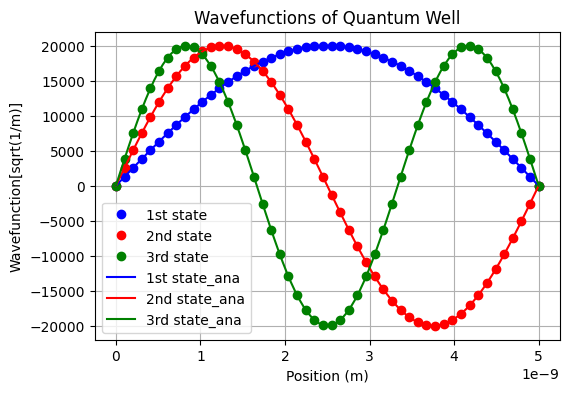

the initial 1st, 2nd, 3rd energy level (eV): [0.0791376  0.31622521 0.71028858]
En_num1:0.079eV, En_num2:0.316eV, En_num3:0.710eV
En_ana1:0.079eV, En_ana2:0.317eV, En_ana3:0.712eV


In [35]:
from constant import q,m0,kB,k,epsilon_si,epsilon_ox,epsilon0,nint,T,kT,h,hbar,m
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import eigh

a=5*1e-9
N=50
N_inner=N-2
dx=a/(N-1)

A = np.zeros((N_inner, N_inner))
np.fill_diagonal(A, -2)
for i in range(N_inner - 1):
    A[i, i + 1] = 1
    A[i + 1, i] = 1
#print(A)

E, psi=eigh(-hbar**2/(2*m*q)*A/dx**2) #eigenvalue Energy, eigenvector wave fu
#print(E)
#print(psi)
x = np.linspace(0, a, N)

wavefunctions = np.zeros((N, psi.shape[1])) 
wavefunctions[1:-1, :] = psi

# Numerical wavefunction normalization processing
for n in range(wavefunctions.shape[1]):
    norm = np.sqrt(np.sum(wavefunctions[:, n]**2) * dx)
    wavefunctions[:, n] /= norm

# Analytical solution
x_ana = np.linspace(0, a, 100)
psi_ana1= np.sqrt(2 / a) * np.sin(1 * x_ana* np.pi / a)
psi_ana2= np.sqrt(2 / a) * np.sin(2 * x_ana* np.pi / a)
psi_ana3= np.sqrt(2 / a) * np.sin(3 * x_ana* np.pi / a)

plt.figure(figsize=(6,4))
plt.plot(x, wavefunctions[:, 0], 'bo', label='1st state')
plt.plot(x, wavefunctions[:, 1], 'ro', label='2nd state')
plt.plot(x, -wavefunctions[:, 2], 'go', label='3rd state')
plt.plot(x_ana, psi_ana1, 'b', label='1st state_ana')
plt.plot(x_ana, psi_ana2, 'r', label='2nd state_ana')
plt.plot(x_ana, psi_ana3, 'g', label='3rd state_ana')

plt.xlabel('Position (m)'), plt.ylabel('Wavefunction[sqrt(1/m)]'), plt.title('Wavefunctions of Quantum Well')
plt.legend(), plt.grid()
plt.show()
print("the initial 1st, 2nd, 3rd energy level (eV):", E[:3])
print(f"En_num1:{E[0]:0.3f}eV, En_num2:{E[1]:0.3f}eV, En_num3:{E[2]:0.3f}eV")
En_ana1=hbar**2/(2*m*q)*(1*np.pi/a)**2
En_ana2=hbar**2/(2*m*q)*(2*np.pi/a)**2
En_ana3=hbar**2/(2*m*q)*(3*np.pi/a)**2
print(f"En_ana1:{En_ana1:.3f}eV, En_ana2:{En_ana2:.3f}eV, En_ana3:{En_ana3:.3f}eV")